# 선형 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime
from datetime import date

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 데이터 불러오기

In [3]:
df_stock = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\주식시장_일별__20220415170553.csv", encoding='euc-kr')
df_covid = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding='euc-kr')

# 데이터 확인

In [4]:
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [5]:
df_covid.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.02.17.00,6850,246,6313,221,10242,405,11930,804,15729,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,2022.02.16.00,6604,227,6092,179,9837,340,11126,639,14865,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,2022.02.15.00,6377,182,5913,136,9497,218,10487,316,14122,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,2022.02.14.00,6195,96,5777,91,9279,256,10171,336,13669,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,2022.02.13.00,6099,184,5686,111,9023,248,9835,408,13192,...,15272,430,21753,747,24882,800,17440,664,27416,728


# Covid

In [6]:
df_covid_num = df_covid.drop(['자치구 기준일'], axis = 1)

In [7]:
df_covid_num.head()

,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,6850,246,6313,221,10242,405,11930,804,15729,864,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,6604,227,6092,179,9837,340,11126,639,14865,743,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,6377,182,5913,136,9497,218,10487,316,14122,453,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,6195,96,5777,91,9279,256,10171,336,13669,477,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,6099,184,5686,111,9023,248,9835,408,13192,448,...,15272,430,21753,747,24882,800,17440,664,27416,728


In [8]:
# 서울 전체구 데이터 병합
df_covid_num = df_covid_num.sum(axis = 1)

In [9]:
df_covid_num.head()

0    468666
1    448168
2    422863
3    409556
4    398182
dtype: int64

In [10]:
df_covid_num = df_covid_num.to_frame()
df_covid_num.columns = ['서울 전체']

In [11]:
df_covid_num.head()

,서울 전체
0,468666
1,448168
2,422863
3,409556
4,398182


In [12]:
df_covid = pd.concat([df_covid['자치구 기준일'], df_covid_num], axis = 1)

In [13]:
df_covid.head()

,자치구 기준일,서울 전체
0,2022.02.17.00,468666
1,2022.02.16.00,448168
2,2022.02.15.00,422863
3,2022.02.14.00,409556
4,2022.02.13.00,398182


In [14]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
for item in df_covid['자치구 기준일']:
    break_flag = 1
    # print(item)
    item=item.split('.')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])
    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        # print(datetime.date(year,month,day))
df_covid['자치구 기준일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

df_covid.dropna(axis=0, inplace = True)
df_covid = df_covid.drop_duplicates(['자치구 기준일'])
df_covid["서울 전체"]=df_covid["서울 전체"].apply(float)
df_covid = df_covid.sort_values('자치구 기준일', ascending = True)

# print(type(remove_set[0]))
# print(type(str(date(year, month, day))))
# print(str(date(year, month, day)))

# dropna는 행(열) 중 에서 결측치가 존재하는 행(열)을 제거한다.
# axis = 0이면 행을 제거하고 axis = 1이면 열을 제거한다.
# thresh = N 옵션을 주면 해당 행(열)에 N개 이상의 값이 존재하면 결측치가 존재해도 행(열)을 제거하지 않는다.
# inplace = True 옵션을 주면 항구적 적용이 가능하다.

In [15]:
# 확인용 코드
print(len(remove_set))

27


In [16]:
# 확인용 코드
df_covid['자치구 기준일']

744    2020-02-05
743    2020-02-06
742    2020-02-07
739    2020-02-10
738    2020-02-11
          ...    
6      2022-02-11
3      2022-02-14
2      2022-02-15
1      2022-02-16
0      2022-02-17
Name: 자치구 기준일, Length: 505, dtype: object

In [17]:
# 확인용 코드
df_covid.head(3)

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0


In [18]:
# 확인용 코드
df_covid.tail(3)

,자치구 기준일,서울 전체
2,2022-02-15,422863.0
1,2022-02-16,448168.0
0,2022-02-17,468666.0


In [19]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 744 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  505 non-null    object 
 1   서울 전체    505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [20]:
# 오미크론 우세종 된 이후 데이터 제거
df_covid = df_covid[df_covid['자치구 기준일'] < '2022-01-09']

In [21]:
df_covid

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0
739,2020-02-10,0.0
738,2020-02-11,0.0
...,...,...
45,2022-01-03,229860.0
44,2022-01-04,230739.0
43,2022-01-05,232625.0
42,2022-01-06,233627.0


In [22]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 744 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  479 non-null    object 
 1   서울 전체    479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# Stock

In [23]:
# 확인용 코드
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [24]:
# 데이터 전처리 - 전치 + 날짜 형식 변환
df_stock_day = df_stock.columns.values.tolist()
df_stock = df_stock.T
# print(df_stock.T.head())
df_stock['날짜'] = df_stock_day

In [25]:
date_set=[]
for item in df_stock['날짜']:
    # print(item)
    if(item == '계정별'):
        date_set+=[np.nan]
    else:
        item=item.split('.')
        year=int(item[0])
        month=int(item[1])
        day=int(item[2])
        date_set+=[str(date(year,month,day))]
    # print(datetime.date(year,month,day))
df_stock['날짜'] = date_set
# df_stock['날짜'] = pd.to_datetime(df_stock['날짜'])

df_stock.dropna(axis=0, inplace = True)
df_stock.rename(columns={0:'KOSPI'}, inplace = True)
df_stock = df_stock[['KOSPI', '날짜']]
df_stock["KOSPI"]=df_stock["KOSPI"].apply(float)
df_stock = df_stock.sort_values('날짜', ascending = True)

In [26]:
# 확인용 코드
df_stock.head(3)

,KOSPI,날짜
2020.02.05,2165.63,2020-02-05
2020.02.06,2227.94,2020-02-06
2020.02.07,2211.95,2020-02-07


In [27]:
# 확인용 코드
df_stock.tail(3)

,KOSPI,날짜
2022.02.15,2676.54,2022-02-15
2022.02.16,2729.68,2022-02-16
2022.02.17,2744.09,2022-02-17


In [28]:
df_stock = df_stock[df_stock['날짜'] < '2022-01-09']

In [29]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2020.02.05 to 2022.01.07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   479 non-null    float64
 1   날짜      479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [30]:
# 확인용 코드
df_covid.head(3)

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0


In [31]:
# 확인용 코드
df_covid.tail(3)

,자치구 기준일,서울 전체
43,2022-01-05,232625.0
42,2022-01-06,233627.0
41,2022-01-07,234495.0


In [32]:
# 확인용 코드
list1 = list(np.array(df_covid['자치구 기준일'].tolist()))
print(len(set(list1)))

479


In [33]:
# 확인용 코드
list2 = list(np.array(df_stock['날짜'].tolist()))
print(len(set(list1)))

479


In [34]:
# 확인용 코드
C = list(set(list1) - set(list2))
D = list(set(list2) - set(list1))
print(C)
print(D)

[]
[]


In [35]:
# 확인용 코드
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2020.02.05 to 2022.01.07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   479 non-null    float64
 1   날짜      479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [36]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 744 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  479 non-null    object 
 1   서울 전체    479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# 시각화

In [37]:
import matplotlib.pyplot as plt

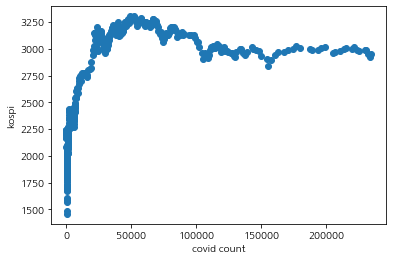

In [38]:
# 시각화
df_covid_count = df_covid['서울 전체']
df_kospi = df_stock['KOSPI']
plt.scatter(df_covid_count, df_kospi)
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# 데이터셋 분류
train_input, test_input, train_target, test_target = train_test_split(
    df_covid_count, df_kospi,  random_state=42)

In [41]:
print(train_input.shape, test_input.shape)

(359,) (120,)


In [42]:
# test_array = np.array([1,2,3,4])
# print(test_array.shape)

In [43]:
# test_array = test_array.reshape(2, 2)
# print(test_array.shape)

In [44]:
# reshape 메서드 : 원본 배열의 원소 개수와 reshape 배열의 원소 개수가 다르면 에러 발생
# test_array = test_array.reshape(2, 3)

In [45]:
# 데이터셋 전처리
train_input = train_input.values.reshape(-1, 1)
test_input = test_input.values.reshape(-1, 1)

In [46]:
print(train_input.shape, test_input.shape)

(359, 1) (120, 1)


# k-최근접 이웃의 한계

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# K-최근접 이웃 회귀 모델 선정 & 훈련 by 훈련 데이터
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [36]:
# 테스트 코드
print(knr.predict([[10000]]))

[2739.14]


In [37]:
import matplotlib.pyplot as plt

[[242 223   9]]


ValueError: Wrong number of dimensions. values.ndim > ndim [2 > 1]

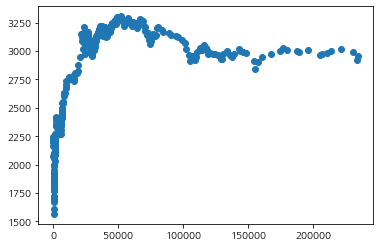

In [50]:
# 10만명 확진자에서 이웃까지의 거리, 이웃 샘플의 인덱스
distances, indexes = knr.kneighbors([[100000]])
print(indexes)

# 훈련 데이터 시각화
plt.scatter(train_input, train_target)
# 이웃 샘플 데이터 시각화
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 1만명 코로나 데이터 시각화
plt.scatter(10000, 2701.19, marker='^')
plt.title('n_neighbors = 3')  
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

In [ ]:
print(knr.predict([[10000000]]))

In [ ]:
# 1000만명 확진자에서 이웃까지의 거리, 이웃 샘플의 인덱스
distances, indexes = knr.kneighbors([[10000000]])

# 훈련 데이터 시각화
plt.scatter(train_input, train_target)
# 이웃 샘플 데이터 시각화
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 1000만명 코로나 데이터 시각화
plt.scatter(10000000, 2739.14, marker='^')
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.show()

## 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# 선형 회귀 모델 선정 & 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)

In [ ]:
# 30만명 코로나 결과 예측
print(lr.predict([[300000]]))

In [ ]:
# 파라미터 출력
print(lr.coef_, lr.intercept_)

In [ ]:
# 시각화
plt.scatter(train_input, train_target, label='Original Data')
# 0 ~ 30만 코로나 범위 1차 방정식 그래프
plt.plot([0, 300000], [0*lr.coef_+lr.intercept_, 300000*lr.coef_+lr.intercept_], 'r', label='Linear Regression')
# 30만명 코로나 데이터 시각화
plt.scatter(300000, lr.predict([[300000]]), marker='^')
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.legend()
plt.show()

# 결과 예측 by 테스트 데이터
test_prediction = lr.predict(test_input)

# 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
print("linear_train_accuracy :", end = ' ')
print(lr.score(train_input, train_target))
print("linear_test_accuracy :", end = ' ')
print(lr.score(test_input, test_target))

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_prediction)
mse = mean_squared_error(test_target, test_prediction)
rmse = np.sqrt(mse)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# # from sklearn.preprocessing import StandardScaler
# # from sklearn.pipeline import Pipeline
# lr = LinearRegression()
# param_grid = {}
# cv=KFold(n_splits=10)
# gs_lr = GridSearchCV(lr, param_grid=param_grid, cv=cv)
# gs_lr.fit(train_input, train_target)
# # y_predict = best_model.predict(x_test)

In [ ]:
# # 전체 GridSearch 결과 출력
# lr_df = pd.DataFrame(gs_lr.cv_results_)
# lr_df

In [ ]:
# # 최고 성능 모델
# print('lr best params', gs_lr.best_params_)   # 최적의 파라미터 값 출력
# print('lr best score', gs_lr.best_score_)      # 최고의 점수

# best_model_lr = gs_lr.best_estimator_

## 다항 회귀

### 2차 그래프

In [ ]:
# 데이터셋 전처리
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

In [ ]:
# 선형 회귀 모델 선정 & 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 30만명 코로나 결과 예측
print(lr.predict([[300000**2, 300000]]))

In [ ]:
# 파라미터 출력
print(lr.coef_, lr.intercept_)

In [ ]:
# 시각화
plt.scatter(train_input, train_target, label='Original Data')
# 0 ~ 30만 코로나 범위 2차 방정식 그래프
# point = np.arange(0, 300000, 1)
point = np.linspace(0, 300000, 300000)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, 'r', label='Poly Linear Regression')
# 30만명 코로나 데이터 시각화
plt.scatter([300000], [lr.predict([[300000**2, 300000]])], marker='^')
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.legend()
plt.show()

# 결과 예측 by 테스트 데이터
test_prediction = lr.predict(test_poly)

# 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
print("poly_train_accuracy :", end = ' ')
print(lr.score(train_poly, train_target))
print("poly_test_accuracy :", end = ' ')
print(lr.score(test_poly, test_target))

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_prediction)
mse = mean_squared_error(test_target, test_prediction)
rmse = np.sqrt(mse)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

### 모듈 이용

In [ ]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
#     pipeline = Pipeline([("polynomial_features", polynomial_features),
#                     ("linear_regression", lr)])
#     pipeline.fit(train_poly[:, np.newaxis], train_target)
    lr.fit(train_poly, train_target)

    # 파라미터 출력
    print("intercept : ", lr.intercept_)
    print("coefficient : ", lr.coef_)
    print()

    # 시각화
    plt.scatter(train_input, train_target, label="Original Data")

#     point = np.arange(0, 10000**(1/i)).reshape(-1, 1)
    # 예측값 곡선
    X_new = np.linspace(0, 250000, 250000).reshape(250000, 1)
#     plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    X_new_poly = poly_features.transform(X_new)
    y_new = lr.predict(X_new_poly)
    
# 실제 값 곡선
#     plt.plot(X_test, true_fun(X_test), '--', label="True function")
#     point_poly_input = poly_features.transform(point)
#     point_poly_pre = lr.predict(point_poly_input)
#     plt.plot(point_poly_input, point_poly_pre)
    plt.plot(X_new, y_new, "r", linewidth=2, label="Poly Linear Regression")
    plt.xlabel('covid count')
    plt.ylabel('kospi')
    plt.legend()
# plt.axis([-3000, 10000, 1500, 4000])

    # 결과 예측 by 테스트 데이터
    test_prediction = lr.predict(test_poly)

    # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
    print("train accuracy : ", lr.score(train_poly, train_target))
    print("test accuracy : ", lr.score(test_poly, test_target))

    # 평균 오차 계산 by 테스트 데이터
    mae = mean_absolute_error(test_target, test_prediction)
    mse = mean_squared_error(test_target, test_prediction)
    rmse = np.sqrt(mse)
    print('MAE : {0:.3f}'.format(mae))
    print('MSE : {0:.3f}'.format(mse))
    print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

In [ ]:
# train_errors, val_errors = [], []
# for m in range (1, len(train_input)):
#     model.fit(train_input[:m], train_target[:m])
#     y_train_predict = model.predict(train_input[:m])
#     y_val_predict = model.predict(X_val)
#     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#     val_errors.append(mean_squared_error(y_val, y_val_predict))
# plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train set")
# plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "validation set") 
# plt.xlabel("size of train set")
# plt.ylabel("RMSE")
# plt.legend()

# Standard Scaler

## Small N

In [ ]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)
    
    ss = StandardScaler()
    ss.fit(train_poly)
    
    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    lr.fit(train_scaled, train_target)
    #     pipeline = Pipeline([("polynomial_features", polynomial_features),
    #                     ("linear_regression", lr)])
    #     pipeline.fit(train_poly[:, np.newaxis], train_target)

    # 파라미터 출력
    print("intercept : ", lr.intercept_)
    print("coefficient : ", lr.coef_)
    print()

    # 시각화
    plt.scatter(train_input, train_target, label="Original Data")

    # 예측값 곡선
    X_new = np.linspace(0, 200000, 200000).reshape(200000, 1)
    X_new_poly = poly_features.transform(X_new)
    X_new_scaled = ss.transform(X_new_poly)
    y_new = lr.predict(X_new_scaled)
    
    # 실제 값 곡선
    # plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    #     plt.plot(X_test, true_fun(X_test), '--', label="True function")
    #     point_poly_input = poly_features.transform(point)
    #     point_poly_pre = lr.predict(point_poly_input)
    #     plt.plot(point_poly_input, point_poly_pre)
    plt.plot(X_new, y_new, "r", linewidth=2, label=str(degrees[i]) + "Poly Linear Regression")
    plt.xlabel('covid count')
    plt.ylabel('kospi')
    plt.legend()
    # plt.axis([-3000, 10000, 1500, 4000])

    # 결과 예측 by 테스트 데이터
    test_prediction = lr.predict(test_scaled)

    # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
    print("train accuracy : ", lr.score(train_scaled, train_target))
    print("test accuracy : ", lr.score(test_scaled, test_target))

    # 평균 오차 계산 by 테스트 데이터
    mae = mean_absolute_error(test_target, test_prediction)
    mse = mean_squared_error(test_target, test_prediction)
    rmse = np.sqrt(mse)
    print('MAE : {0:.3f}'.format(mae))
    print('MSE : {0:.3f}'.format(mse))
    print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

## Big N

In [ ]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)
    
    ss = StandardScaler()
    ss.fit(train_poly)
    
    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    lr.fit(train_scaled, train_target)
    #     pipeline = Pipeline([("polynomial_features", polynomial_features),
    #                     ("linear_regression", lr)])
    #     pipeline.fit(train_poly[:, np.newaxis], train_target)

    # 파라미터 출력
    print("intercept : ", lr.intercept_)
    print("coefficient : ", lr.coef_)
    print()

    # 시각화
    plt.scatter(train_input, train_target, label="Original Data")

    # 예측값 곡선
    X_new = np.linspace(0, 300000, 300000).reshape(300000, 1)
    X_new_poly = poly_features.transform(X_new)
    X_new_scaled = ss.transform(X_new_poly)
    y_new = lr.predict(X_new_scaled)
    
    # 실제 값 곡선
    # plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    #     plt.plot(X_test, true_fun(X_test), '--', label="True function")
    #     point_poly_input = poly_features.transform(point)
    #     point_poly_pre = lr.predict(point_poly_input)
    #     plt.plot(point_poly_input, point_poly_pre)
    plt.plot(X_new, y_new, "r", linewidth=2, label=str(degrees[i]) + "Poly Linear Regression")
    plt.xlabel('covid count')
    plt.ylabel('kospi')
    plt.legend()
    # plt.axis([-3000, 10000, 1500, 4000])

    # 결과 예측 by 테스트 데이터
    test_prediction = lr.predict(test_scaled)

    # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
    print("train accuracy : ", lr.score(train_scaled, train_target))
    print("test accuracy : ", lr.score(test_scaled, test_target))

    # 평균 오차 계산 by 테스트 데이터
    mae = mean_absolute_error(test_target, test_prediction)
    mse = mean_squared_error(test_target, test_prediction)
    rmse = np.sqrt(mse)
    print('MAE : {0:.3f}'.format(mae))
    print('MSE : {0:.3f}'.format(mse))
    print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

# K-Fold ## 오류 발생

In [ ]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = [2, 3, 4, 5, 8, 10, 20, 30]
kf = KFold(n_splits = 10, shuffle = True, random_state = 0)


# 다항식 시각화
for i in range(len(degrees)):
    n_iter = 0
    for train_index, test_index in kf.split(df_covid):
        n_iter += 1
        print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
        print("degrees : ", degrees[i])
        print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
        ax = plt.subplot(2, len(degrees)/2, i + 1)
        plt.setp(ax, xticks=(), yticks=())
        
        train_input, test_input = df_covid[train_index], df_covid[test_index]
        train_target, test_target = df_stock[train_index], df_stock[test_index]

        poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
        train_poly = poly_features.fit_transform(train_input)
        test_poly = poly_features.transform(test_input)

        ss = StandardScaler()
        ss.fit(train_poly)

        train_scaled = ss.transform(train_poly)
        test_scaled = ss.transform(test_poly)

        # 선형 회귀 모델 선정 & 훈련
        lr = LinearRegression()
        lr.fit(train_scaled, train_target)
        #     pipeline = Pipeline([("polynomial_features", polynomial_features),
        #                     ("linear_regression", lr)])
        #     pipeline.fit(train_poly[:, np.newaxis], train_target)

        # 파라미터 출력
        print("intercept : ", lr.intercept_)
        print("coefficient : ", lr.coef_)
        print()

        # 시각화
        plt.scatter(train_input, train_target, label="Original Data")

        # 예측값 곡선
        X_new = np.linspace(0, 200000, 200000).reshape(200000, 1)
        X_new_poly = poly_features.transform(X_new)
        X_new_scaled = ss.transform(X_new_poly)
        y_new = lr.predict(X_new_scaled)

        # 실제 값 곡선
        # plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
        #     plt.plot(X_test, true_fun(X_test), '--', label="True function")
        #     point_poly_input = poly_features.transform(point)
        #     point_poly_pre = lr.predict(point_poly_input)
        #     plt.plot(point_poly_input, point_poly_pre)
        plt.plot(X_new, y_new, "r", linewidth=2, label=str(degrees[i]) + "Poly Linear Regression")
        plt.xlabel('covid count')
        plt.ylabel('kospi')
        plt.legend()
        # plt.axis([-3000, 10000, 1500, 4000])

        # 결과 예측 by 테스트 데이터
        test_prediction = lr.predict(test_scaled)

        # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
        print("train accuracy : ", lr.score(train_scaled, train_target))
        print("test accuracy : ", lr.score(test_scaled, test_target))

        # 평균 오차 계산 by 테스트 데이터
        mae = mean_absolute_error(test_target, test_prediction)
        mse = mean_squared_error(test_target, test_prediction)
        rmse = np.sqrt(mse)
        print('MAE : {0:.3f}'.format(mae))
        print('MSE : {0:.3f}'.format(mse))
        print('RMSE : {0:.3f}'.format(rmse))
    
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

# 다항식
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 다항식 변환
print('일차 단항식 계수 피처 : ', train_input[0])
fig = plt.figure(figsize = (15, 15))

degrees = list(range(2, 30))

# 다항식 시각화
for i in range(len(degrees)):
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    print("degrees : ", degrees[i])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degrees[i], include_bias = True)
    train_poly = poly_features.fit_transform(train_input)
    test_poly = poly_features.transform(test_input)
    
    ss = StandardScaler()
    ss.fit(train_poly)
    
    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)

    # 선형 회귀 모델 선정 & 훈련
    lr = LinearRegression()
    scores = cross_val_score(lr, np.concatenate([train_scaled, test_scaled], 0), 
                             np.concatenate([train_target, test_target], 0), cv=10)
    #     pipeline = Pipeline([("polynomial_features", polynomial_features),
    #                     ("linear_regression", lr)])
    #     pipeline.fit(train_poly[:, np.newaxis], train_target)
    print(f"한 번씩 검증 때마다 accuracy : {scores}")
    print()
    print(f"5번 모두 검증한 accuracy 총 평균 : {np.mean(scores)}")

#     # 파라미터 출력
#     print("intercept : ", lr.intercept_)
#     print("coefficient : ", lr.coef_)
#     print()

#     # 시각화
#     plt.scatter(train_input, train_target, label="Original Data")

#     # 예측값 곡선
#     X_new = np.linspace(0, 200000, 200000).reshape(200000, 1)
#     X_new_poly = poly_features.transform(X_new)
#     X_new_scaled = ss.transform(X_new_poly)
#     y_new = lr.predict(X_new_scaled)
    
#     # 실제 값 곡선
#     # plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
#     #     plt.plot(X_test, true_fun(X_test), '--', label="True function")
#     #     point_poly_input = poly_features.transform(point)
#     #     point_poly_pre = lr.predict(point_poly_input)
#     #     plt.plot(point_poly_input, point_poly_pre)
#     plt.plot(X_new, y_new, "r", linewidth=2, label=str(degrees[i]) + "Poly Linear Regression")
#     plt.xlabel('covid count')
#     plt.ylabel('kospi')
#     plt.legend()
#     # plt.axis([-3000, 10000, 1500, 4000])

#     # 결과 예측 by 테스트 데이터
#     test_prediction = lr.predict(test_scaled)

#     # 모델분석(결정계수) by 테스트 데이터 & 테스트 데이터
#     print("train accuracy : ", lr.score(train_scaled, train_target))
#     print("test accuracy : ", lr.score(test_scaled, test_target))

#     # 평균 오차 계산 by 테스트 데이터
#     mae = mean_absolute_error(test_target, test_prediction)
#     mse = mean_squared_error(test_target, test_prediction)
#     rmse = np.sqrt(mse)
#     print('MAE : {0:.3f}'.format(mae))
#     print('MSE : {0:.3f}'.format(mse))
#     print('RMSE : {0:.3f}'.format(rmse))
    
# plt.show()

In [ ]:
train_scaled